Machine Learning & Artificial Intelligence
# **Group Assignment:**
### **PedalPals: Optimizing Bike Sharing Demand Forecasting for the Amsterdam Market**
Professor: Pablo Navarro

Assignment done by: 
- Aikaterini Orlova
- Clara Florindo
- Edgardo Alvarez
- Gebru Abrha
- João André Pinho

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#  **Business Case and Dataset Description**

<center><img src="logo.png"/></center>

**Business Case Description:**

Amsterdam is a city with a thriving cycling culture, making it an ideal location for a bike sharing company to enter the market. **PedalPals**, a small company with limited resources, is considering entering this market, and in order to make the most of this decision, it decided to acquire a dataset on the Amsterdam bike sharing scene from a reputable market research firm, which would provide valuable insights into the local market. After a brief analysis, the PedalPals Machine Learning and AI Engineering Team immediately suggested **estimating demand (regression problem)** in order to later make informed decisions regarding cash flow estimation and proper bycicle investment. 

**Dataset Description:**

This dataset contains a comprehensive collection of bike sharing data that captures a variety of characteristics that impact bike utilization. Intially, each row represents one hour, with columns including information such as the date, season, year, month, hour, and other pertinent factors. These factors include whether the day is a holiday, what day of the week it is, if it is a working day, and the weather. Additionally, the dataset also includes temperature, "feels-like" temperature, humidity, and wind speed data. The dataset also monitors the number of casual users, registered users, and total number of bike rentals for each hour. By studying this vast amount of data, the team may acquire significant insights into the trends and variables influencing bike sharing demand, which can then be used to make sound business decisions.

**Attribute Information:**

- `instant`: Record index;
- `dteday` : Record date;
- `season` : Season ( 1:spring, 2:summer, 3:fall, 4:winter )
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are divided to 41 (max)
- `atemp`: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#  **Resolution**

### **• Libraries and Module Imports:**

Importing the necessary libraries and modules to manipulate and interact with the dataset.

In [2]:
# Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
plt.style.use('fivethirtyeight')
import datetime
from dateutil import relativedelta
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")

### **• Loading the Dataset:**

Loading the purchased Bike Sharing dataset.

In [19]:
# Load the purchased Bike Sharing dataset.

bike_dataset = pd.read_csv("bike-sharing_hourly.csv", index_col=False)

bike_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART I: Exploratory Analysis**

### **• Describing the Dataset:**

Describing the purchased Bike Sharing dataset.

In [20]:
# Describe the purchased Bike Sharing dataset in order to get to know the data.

print(bike_dataset.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [21]:
# Check the Bike Sharing dataset information (attribute types).

bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### **• Detecting Null Values:**

Checking if there are any null values in the Bike Sharing dataset.

In [22]:
# Check if there are null values.

bike_dataset.isna().astype(int).sum()

# Checked: There are no null values for any of the column attributes.

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### **• Detecting Duplicated Entries:**

Checking if there are duplicated entries in the Bike Sharing dataset.

In [23]:
# Check if there are any Duplicated Entries.
bike_dataset.duplicated().sum()

# Checked: No entries are duplicated.

0

### **• Dealing with Datatypes:**

Changing the `dteday` type to datetime, for dataset manipulation purposes, and setting it as an index. 

Creating a `day` of month variable to make it easy to identify time patterns.

In [24]:
# Change 'dteday' datatype.
bike_dataset['dteday'] = bike_dataset['dteday'].astype('datetime64[ns]')

# Create a new 'day' of the month variable.
bike_dataset['day'] = bike_dataset.dteday.dt.day

# Set 'dteday' as index.
bike_dataset = bike_dataset.set_index('dteday')

# Check the new dataframe.
bike_dataset.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


### **• Defining the Discrete and Continuos Variables:**

Organizing the different values in these 2 categories in order to facilitate the dataset manipulation.

In [25]:
discrete_variables = ["season", "holiday", "workingday", "weathersit", "yr", "mnth", "day","hr",'weekday']
continuos_variables = ["temp", "atemp", "hum", "windspeed"]

### **• Dealing with Outliers:**

Identifying and addressing the data points that significantly deviate from the typical values observed in the dataset for the `cnt` variable. Outliers can skew analysis results which can have an impact in the performance of predictive models. 

In [26]:
# Plotting the distribution for "cnt" values.
px.box(bike_dataset, y="cnt")

# Checked: There are a few values of `cnt` that lie well above the average, hence these should be dealt with.

In [27]:
# Checking the entry values that are above 3rd + IQR * 1.5.

IQR = bike_dataset.cnt.quantile(0.75) - bike_dataset.cnt.quantile(0.25)
upper_fence = bike_dataset.cnt.quantile(0.75) + (IQR * 1.5)
outliers = bike_dataset[bike_dataset["cnt"] > upper_fence]

outliers


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-08-23,5537,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651,23
2012-03-12,10359,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644,12
2012-03-12,10360,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712,12
2012-03-13,10383,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676,13
2012-03-13,10384,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-11,16886,4,1,12,8,0,2,1,2,0.34,0.3030,0.61,0.2985,16,708,724,11
2012-12-12,16910,4,1,12,8,0,3,1,2,0.26,0.2576,0.65,0.1642,18,670,688,12
2012-12-13,16934,4,1,12,8,0,4,1,1,0.24,0.2273,0.60,0.1940,24,655,679,13


In [31]:
# Check the % of entries that constitutes outliers in order to think on how to address them.

print(f"These outlier entries represent {round((len(outliers)/len(bike_dataset))*100, ndigits=2)}% of the total data.")

# Checked: Since the percentage share of outliers from the total data is so low, these entries can be removed. 

These outlier entries represent 2.91% of the total data.


In [32]:
# Removing the outliers.
bike_dataset = bike_dataset.loc[bike_dataset.cnt <= upper_fence, :]

bike_dataset

# Checked: The oulier values for the `cnt` attribute were deleted.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31


### **• Distribution Plotting:**

Plotting the distribution of distinct data variables (particularly continuous variables) allows for a clearer representation of the magnitude and range of each variable, as well as determining whether or not they require normalization. 

Given that some machine learning algorithms are sensitive to the scale of input characteristics, this normalization may be necessary  on occasion in order to improve models performance.

<Axes: ylabel='Density'>

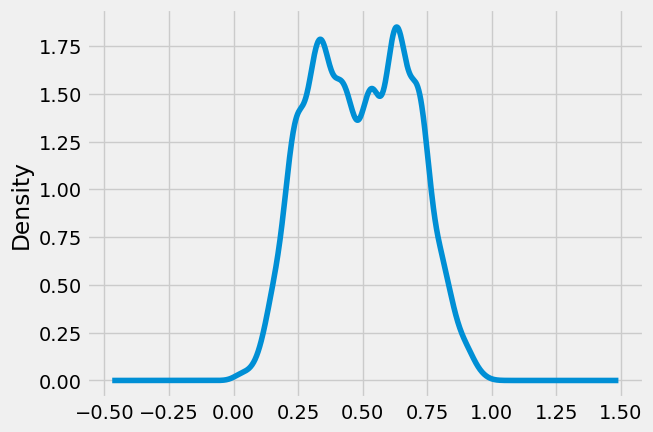

In [33]:
# Plotting the data distribution for the 'temp' feature.

bike_dataset['temp'].plot(kind='density')

<Axes: ylabel='Density'>

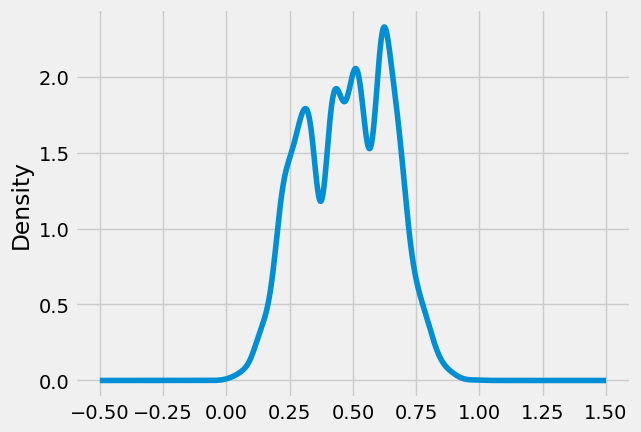

In [34]:
# Plotting the data distribution for the 'atemp' feature.

data['atemp'].plot(kind='density')

<Axes: ylabel='Density'>

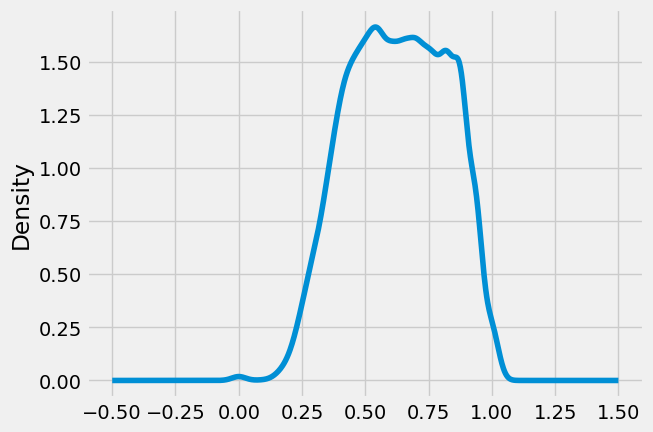

In [35]:
# Plotting the data distribution for the 'hum' feature.

data['hum'].plot(kind='density')

<Axes: ylabel='Density'>

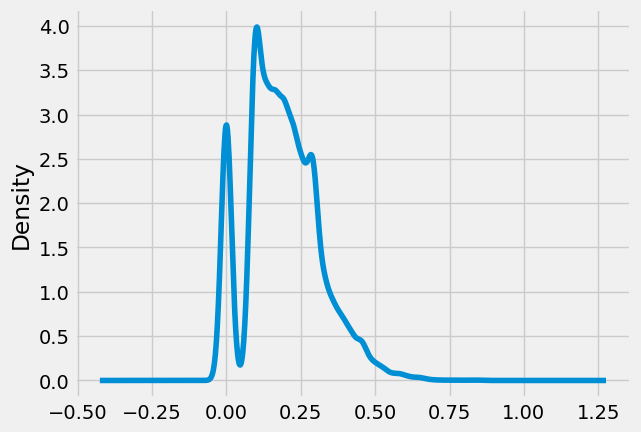

In [36]:
# Plotting the data distribution for the 'windspeed' feature.

data['windspeed'].plot(kind='density')

**Insights**: According to the plottings, the `tem`,`atemp`, `hum`, and `windspeed` features are already more or less normalized and don't clearly show outliers, thus their values will be retained as is for the time being.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Data Exploration

- Define a DataFrame (dfUser) to plot analysis between `userType`.
- Each instant is duplicated for casual/registerd users where `cnt` corresponds to the number of users of each type.

#rephrase it 

In [57]:
dfCasual = data.copy().reset_index()
dfCasual['userType'] = 'casual'
dfReg = data.copy().reset_index()
dfReg['userType'] = 'registered'
dfUser = pd.merge(dfCasual, dfReg, how='outer')
dfUser.loc[dfUser.userType == 'casual', 'cnt'] = dfUser['casual']
dfUser.loc[dfUser.userType == 'registered', 'cnt'] = dfUser['registered']
dfUser = dfUser.drop(['casual','registered'], axis=1)
dfUser.sort_values(by='instant').head(4)


,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,userType
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,1,casual
16874,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,1,registered
16875,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,registered
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,1,casual


1. Evolution of total bikes per day segmented by User Type

In [58]:
px.histogram(dfUser, x='dteday', y="cnt", color='userType', title='Total Bikes per Day - Segmented by User Type')

2. Exploring **categorical** variables
- Average usage of bikes for categorical variables

# comment these

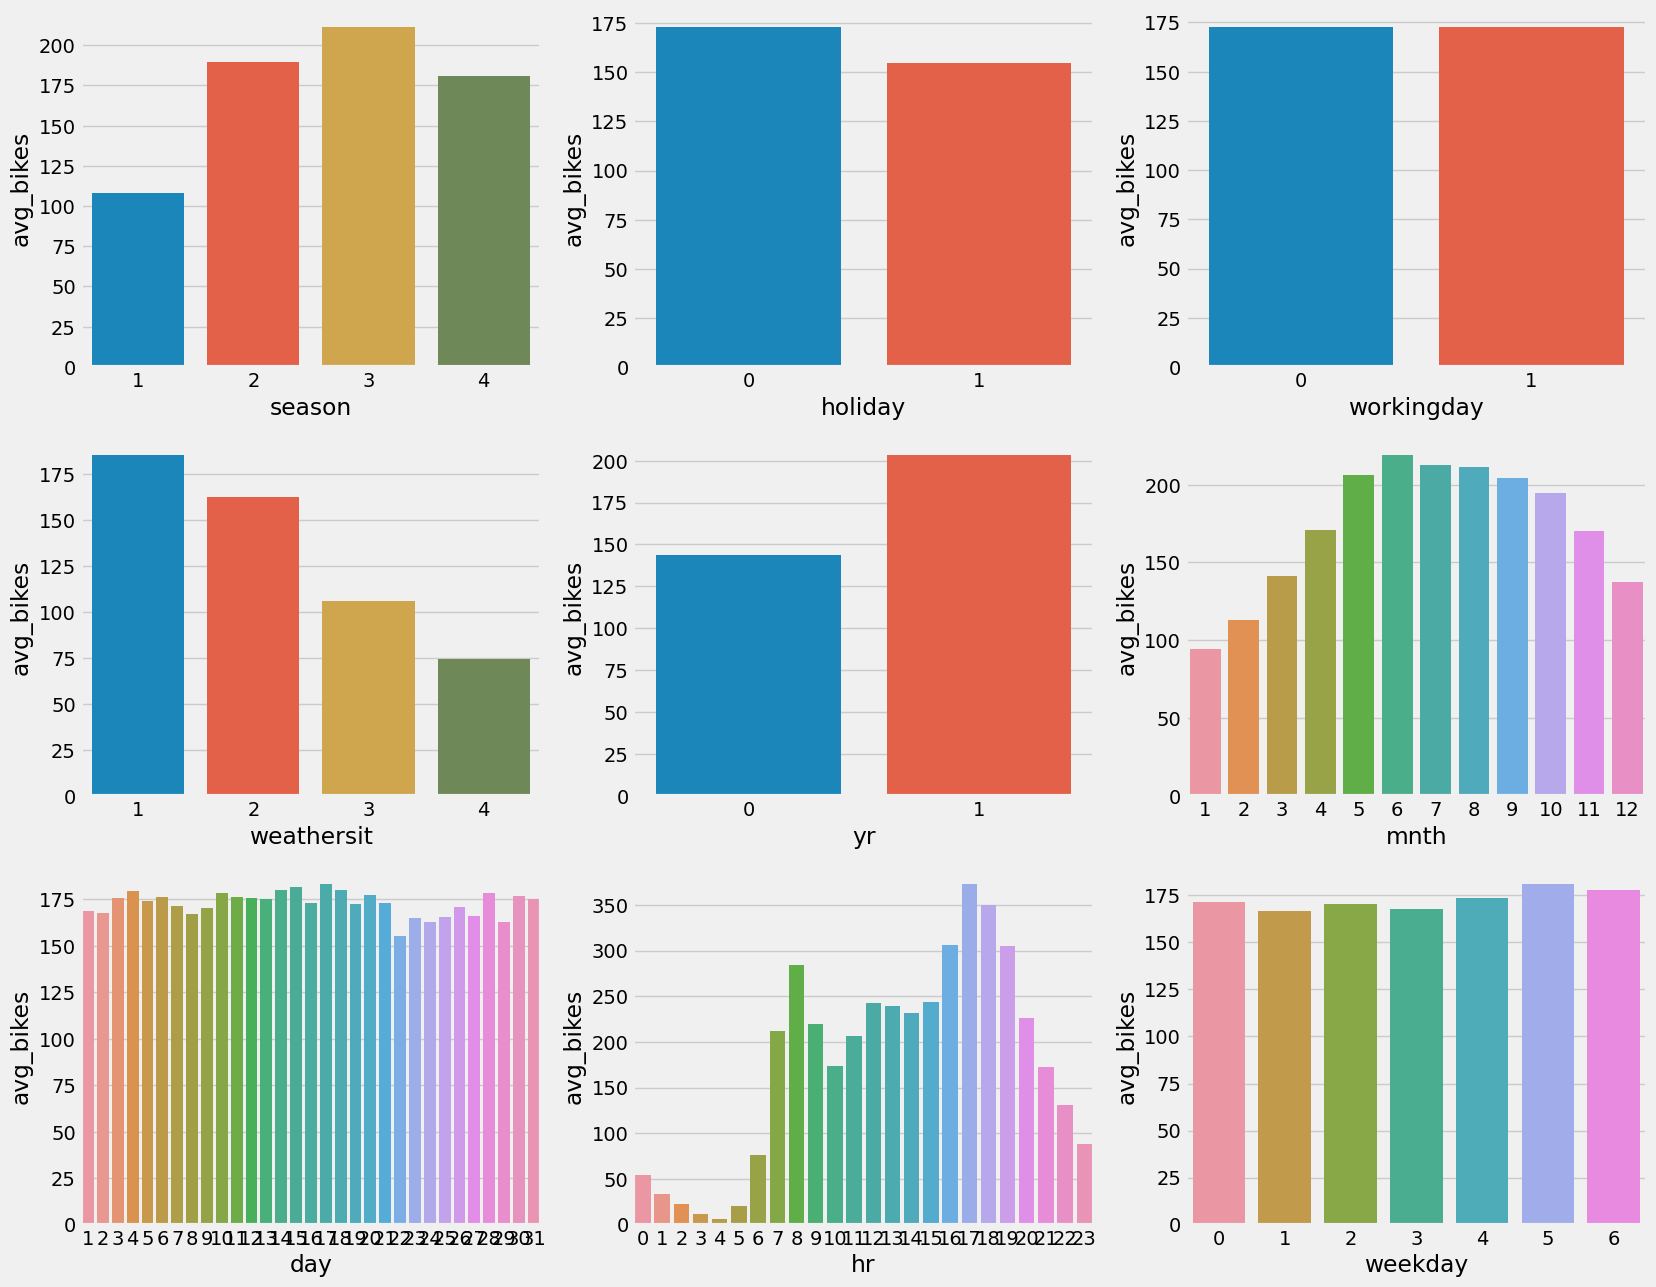

In [59]:
fig, ax = plt.subplots(3,3, figsize=(18,15))

for i in range(len(categorical_variables)):
    var = categorical_variables[i]
    sns.barplot(ax=ax[int(i/3),i-int(i/3)*3], data=data.groupby(var,as_index=False)["cnt"].mean().rename({"cnt":"avg_bikes"},axis=1), x=var, y="avg_bikes")

# why is 

3. Exploring **numerical** variables
- Average usage of bikes continuous variables

# comment this 

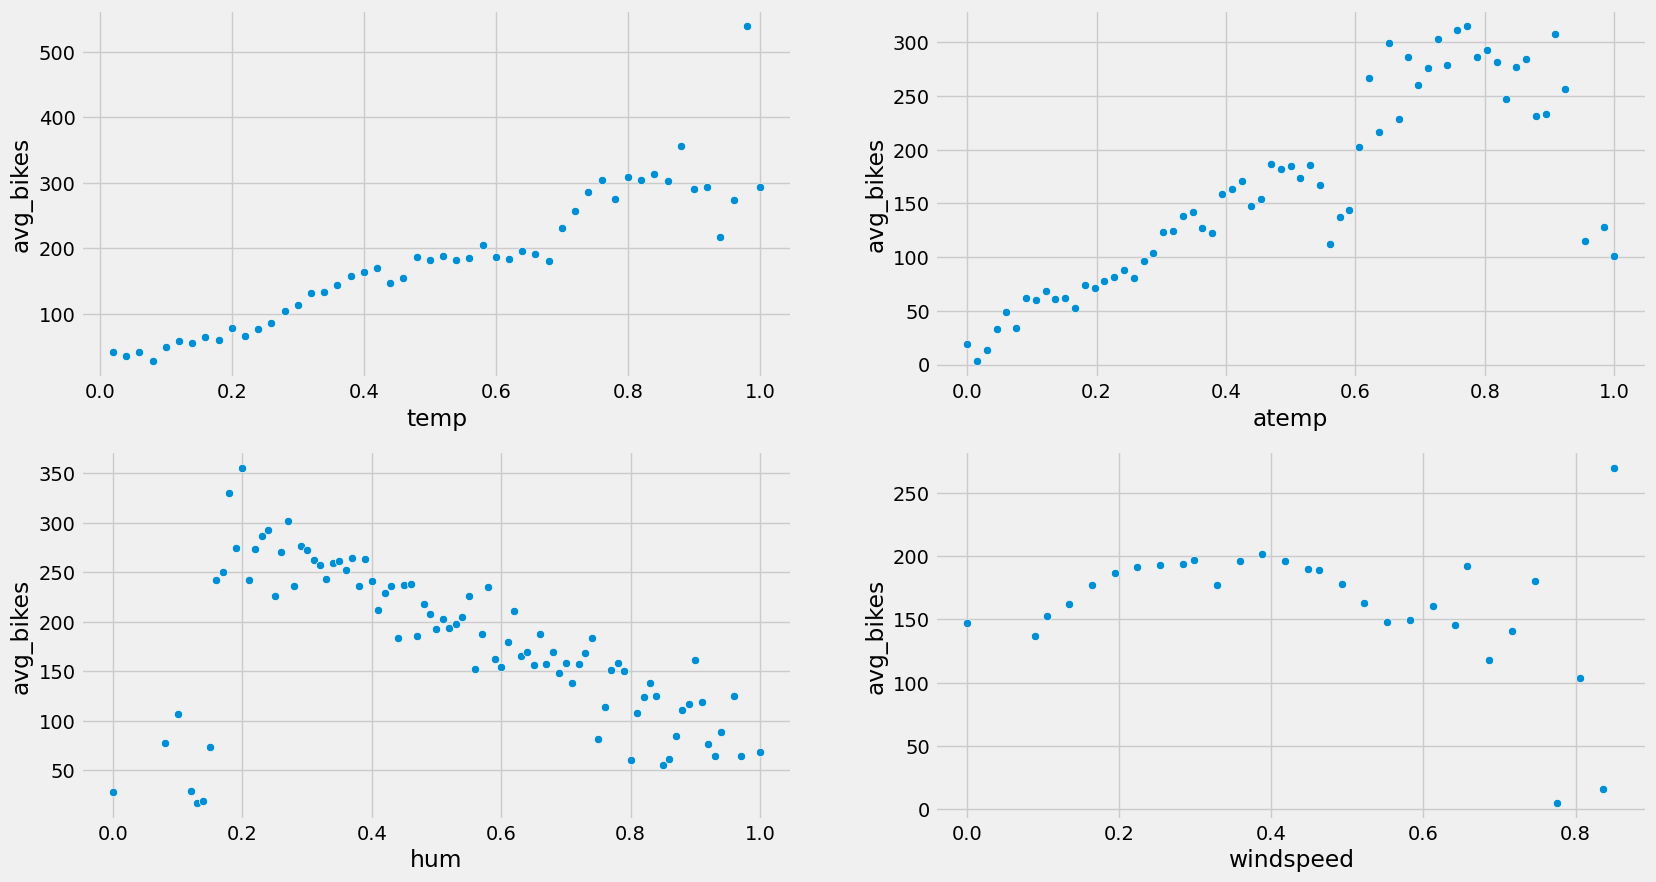

In [60]:
fig, ax = plt.subplots(2,2, figsize=(18,10))

for i in range(len(numerical_variables)):
    var = numerical_variables[i]
    sns.scatterplot(ax=ax[int(i/2),i-int(i/2)*2], data=data.groupby(var,as_index=False)["cnt"].mean().rename({"cnt":"avg_bikes"},axis=1), x=var, y="avg_bikes")

4. Analysing **hourly** trend, segmenting whether is a working day or not

In [61]:
peakhour = data.groupby(["hr","workingday"], as_index=False)["cnt"].mean()
px.line(peakhour, x='hr', y="cnt", color='workingday', markers=True)

From this chart we see a clear division in day hours, so we will create a new variable `dayInstant`:
- 'morning' : 6-9h
- 'midday' : 10-17h
- 'afternoon' : 18-21h
- 'night' : 22-5h

In [62]:
def dayInstant(hr):
    if 6 <= hr and hr <= 9: return 'morning'
    elif 10 <= hr and hr <= 17: return 'midday'
    elif 18 <= hr and hr <= 21: return 'afternoon'
    else: return 'night'

data['dayInstant'] = data['hr'].apply(lambda x: dayInstant(x))
dfUser['dayInstant'] = dfUser['hr'].apply(lambda x: dayInstant(x))

5. Analysing **weekday** trend, segmenting by userType (excluding special holidays)

In [63]:
weekly = dfUser.loc[dfUser.holiday == 0,:].groupby(["weekday","userType"], as_index=False)["cnt"].mean()
px.bar(weekly, x='weekday', y="cnt", color='userType')

### Feature Engineering

Percentage bikes that are registered over total cnt.
- `pct_registered` = `registered` / `cnt`
- From the plots we see that `pct_registered` changes significantly according to some of the categorical variables like `mnth`, `hr`, or `workingday`
- To use this feature in the model we will aggregate it on a "hourly" and "monthly" basis

In [64]:
data['pct_registered'] = data['registered']/data['cnt']

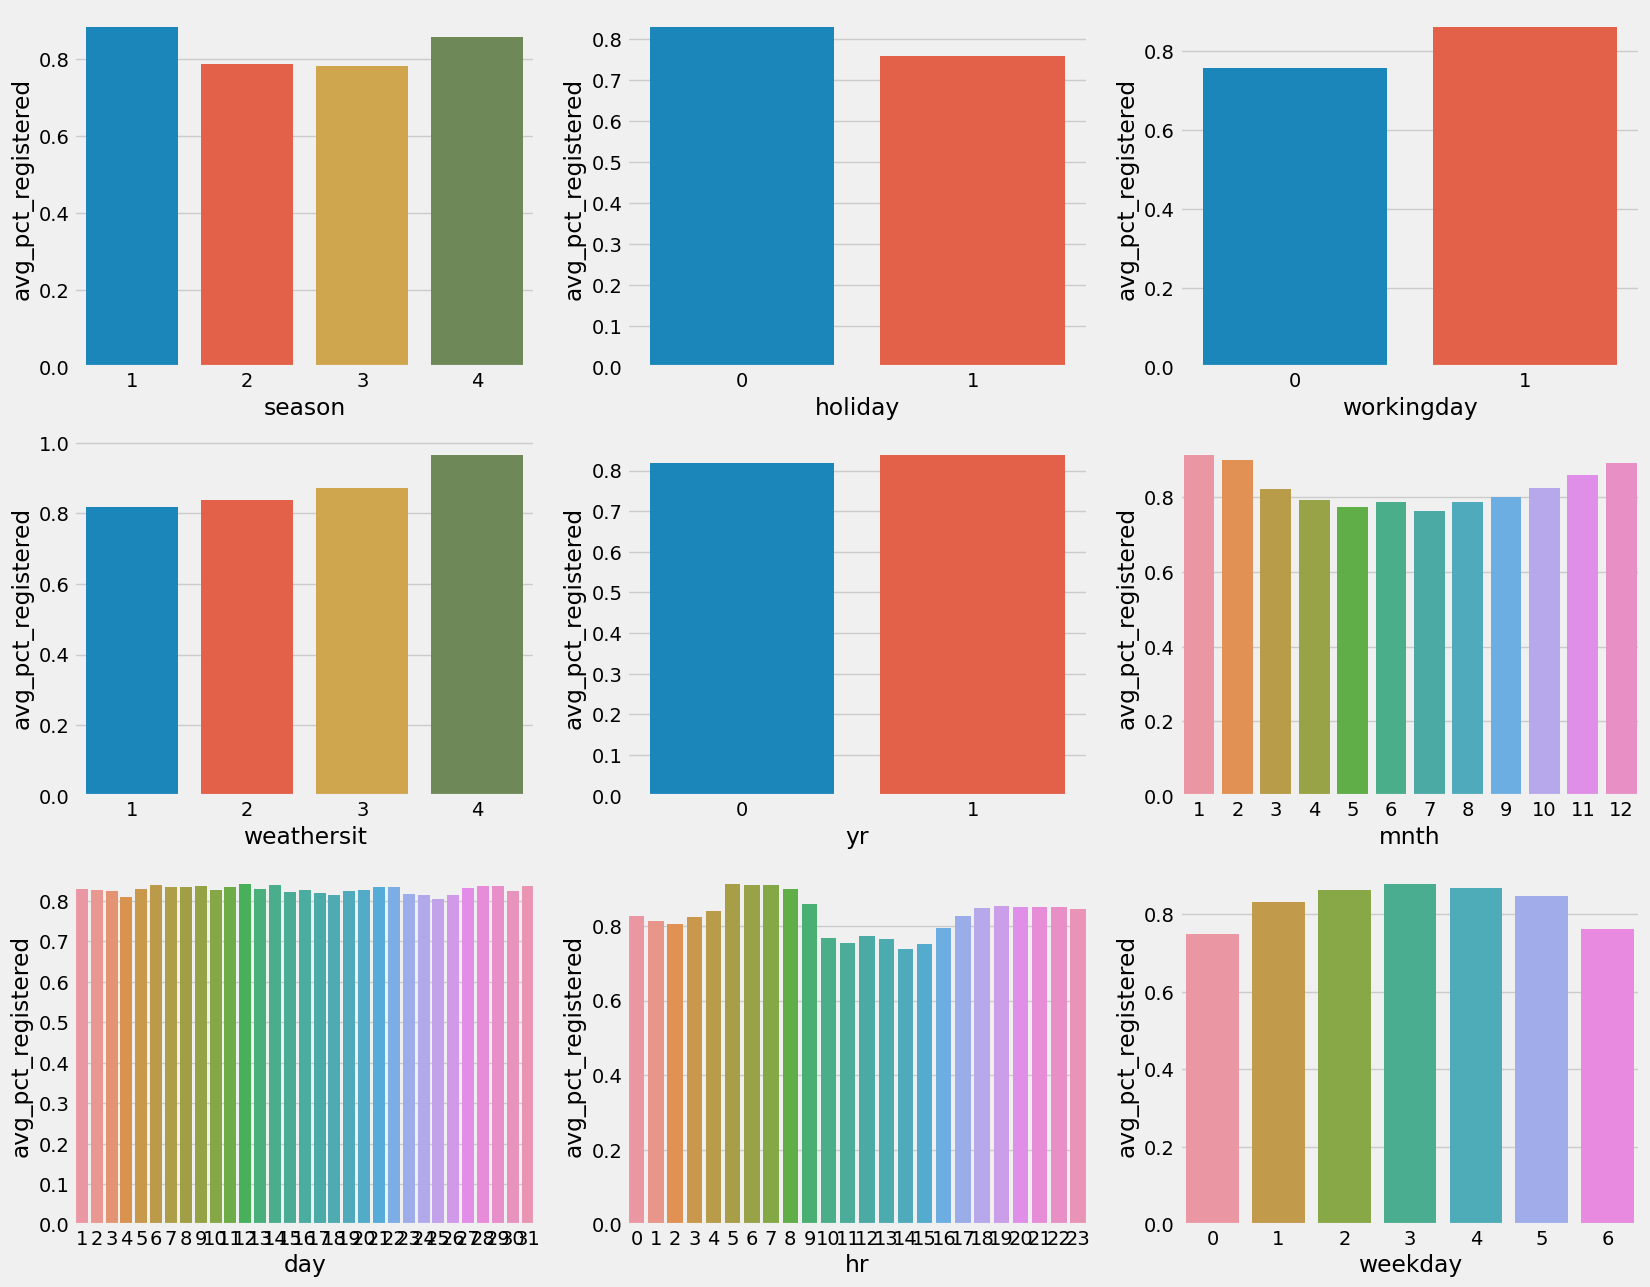

In [65]:
fig, ax = plt.subplots(3,3, figsize=(18,15))

for i in range(len(categorical_variables)):
    var = categorical_variables[i]
    sns.barplot(ax=ax[int(i/3),i-int(i/3)*3], data=data.groupby(var,as_index=False)["pct_registered"].mean().rename({"pct_registered":"avg_pct_registered"},axis=1), x=var, y="avg_pct_registered")

In [66]:
# Aggregating and add feature
pct_registered_hourly = data.groupby('hr')['pct_registered'].mean().to_dict()
data['pct_registered_hourly'] = data['hr'].map(pct_registered_hourly)

pct_registered_monthly = data.groupby('mnth')['pct_registered'].mean().to_dict()
data['pct_registered_monthly'] = data['mnth'].map(pct_registered_monthly)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16874 entries, 2011-01-01 to 2012-12-31
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 16874 non-null  int64  
 1   season                  16874 non-null  int64  
 2   yr                      16874 non-null  int64  
 3   mnth                    16874 non-null  int64  
 4   hr                      16874 non-null  int64  
 5   holiday                 16874 non-null  int64  
 6   weekday                 16874 non-null  int64  
 7   workingday              16874 non-null  int64  
 8   weathersit              16874 non-null  int64  
 9   temp                    16874 non-null  float64
 10  atemp                   16874 non-null  float64
 11  hum                     16874 non-null  float64
 12  windspeed               16874 non-null  float64
 13  casual                  16874 non-null  int64  
 14  registered           

Night and Day variable
- During the "day" light hour there are many more bike rentals.

In [69]:
data["day_night"] = data['hr'].apply(lambda x: 1 if x >= 7 and x <= 23 else 0)
data.groupby('day_night')['cnt'].mean()

day_night
0     32.321736
1    231.842837
Name: cnt, dtype: float64

### Multivariate Analysis

Checking **Correlation** for numerical variables (pearson correlation)
- We produce "PolynomialFeatures" up to 2nd degree to see variable interaction 

In [70]:
from sklearn.preprocessing import PolynomialFeatures
correlation = data.loc[:,[
    'temp',
    'atemp',
    'hum',
    'windspeed',
]]

poly = PolynomialFeatures(2)
correlation = pd.DataFrame(poly.fit_transform(correlation), columns=poly.get_feature_names_out(correlation.columns)).drop(['1'], axis=1)
correlation['cnt'] = data.reset_index().loc[:,'cnt']
correlation.head(2)

,temp,atemp,hum,windspeed,temp^2,temp atemp,temp hum,temp windspeed,atemp^2,atemp hum,atemp windspeed,hum^2,hum windspeed,windspeed^2,cnt
0,0.24,0.2879,0.81,0.0,0.0576,0.069096,0.1944,0.0,0.082886,0.233199,0.0,0.6561,0.0,0.0,16
1,0.22,0.2727,0.80,0.0,0.0484,0.059994,0.1760,0.0,0.074365,0.218160,0.0,0.6400,0.0,0.0,40


In [71]:
correlation.corr()['cnt'].sort_values(ascending=False)

cnt                1.000000
temp               0.401579
atemp              0.398330
temp^2             0.397088
temp atemp         0.396587
atemp^2            0.394437
temp windspeed     0.309070
atemp windspeed    0.305103
windspeed          0.097801
temp hum           0.071052
windspeed^2        0.067995
atemp hum          0.053689
hum windspeed     -0.053692
hum               -0.326973
hum^2             -0.328915
Name: cnt, dtype: float64

In [72]:
# consider which ones may make sense to include given their collinearity (drop atemp, too similar to temperature)
correlation = correlation.corr().sort_values('cnt', ascending=False)
zz = np.array(correlation)
fig = ff.create_annotated_heatmap(
    zz,
    x = list(correlation.columns),
    y = list(correlation.index),
    annotation_text = np.around(zz, decimals=2),
    hoverinfo='z',
    colorscale='RdBu'
)

fig.update_layout(
    height=800,
    width = 800
)

In [73]:
# Given the correlation matrix results, only temp*windspeed and hum^2 were included in the dataframe
data['temp*windspeed'] = data['temp']*data['windspeed']
data['hum^2'] = np.square(data['hum'])

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16874 entries, 2011-01-01 to 2012-12-31
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 16874 non-null  int64  
 1   season                  16874 non-null  int64  
 2   yr                      16874 non-null  int64  
 3   mnth                    16874 non-null  int64  
 4   hr                      16874 non-null  int64  
 5   holiday                 16874 non-null  int64  
 6   weekday                 16874 non-null  int64  
 7   workingday              16874 non-null  int64  
 8   weathersit              16874 non-null  int64  
 9   temp                    16874 non-null  float64
 10  atemp                   16874 non-null  float64
 11  hum                     16874 non-null  float64
 12  windspeed               16874 non-null  float64
 13  casual                  16874 non-null  int64  
 14  registered           

In [76]:
data

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,registered,cnt,day,dayInstant,pct_registered,pct_registered_hourly,pct_registered_monthly,day_night,temp*windspeed,hum^2
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,...,13,16,1,night,0.812500,0.826608,0.912713,0,0.000000,0.6561
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,...,32,40,1,night,0.800000,0.813048,0.912713,0,0.000000,0.6400
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,...,27,32,1,night,0.843750,0.804438,0.912713,0,0.000000,0.6400
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,...,10,13,1,night,0.769231,0.824037,0.912713,0,0.000000,0.5625
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,...,1,1,1,night,1.000000,0.838404,0.912713,0,0.000000,0.5625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,...,108,119,31,afternoon,0.907563,0.852518,0.893173,1,0.042692,0.3600
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,...,81,89,31,afternoon,0.910112,0.851682,0.893173,1,0.042692,0.3600
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,...,83,90,31,afternoon,0.922222,0.851628,0.893173,1,0.042692,0.3600


Checking **Correlation** for categorical variables (anova)


In [74]:
from pandas import array
from sklearn.feature_selection import f_classif
corrAnova = data.loc[:,[
    'season',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'dayInstant',
    'day_night'
]]

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
corrAnova['dayInstant'] = enc.fit_transform(corrAnova['dayInstant'].array.reshape(-1, 1))

lcorr = list(zip(corrAnova.columns, f_classif(corrAnova, data.cnt)[0]))
lcorr = pd.DataFrame(lcorr, columns=['feature','importance']).sort_values(by='importance', ascending=False)
px.bar(lcorr, x='feature', y='importance')


## PART II: Prediction Model

### Data Preparation

In [77]:
X = data.loc[:,[
    'season',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'temp',
    'hum^2',
    'windspeed',
    'temp*windspeed',
    'dayInstant',
    'day_night',
    'pct_registered_hourly',
    'pct_registered_monthly'
]]
y = data.loc[:,['cnt']]

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16874 entries, 2011-01-01 to 2012-12-31
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 16874 non-null  int64  
 1   season                  16874 non-null  int64  
 2   yr                      16874 non-null  int64  
 3   mnth                    16874 non-null  int64  
 4   hr                      16874 non-null  int64  
 5   holiday                 16874 non-null  int64  
 6   weekday                 16874 non-null  int64  
 7   workingday              16874 non-null  int64  
 8   weathersit              16874 non-null  int64  
 9   temp                    16874 non-null  float64
 10  atemp                   16874 non-null  float64
 11  hum                     16874 non-null  float64
 12  windspeed               16874 non-null  float64
 13  casual                  16874 non-null  int64  
 14  registered           

In [83]:
# maybe this was already done, check this
# converting categorical values into dummy values
X = pd.get_dummies(X, columns=['season','mnth','weekday','weathersit','dayInstant'])

### Splitting Data
- Even if you use CV we will keep a test split to calculate performance metrics
- Given this is a regression model, our main metric will be **MAE**

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Base Model: Regression

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

reg1 = LinearRegression().fit(X_train,y_train)
print(f"MAE from TestSet: {mean_absolute_error(y_test, reg1.predict(X_test))}")


MAE from TestSet: 76.47429574856804


### Decision Tree Regression (Trying)

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# create a Decision Tree Regression model
tree_reg = DecisionTreeRegressor(random_state=3)

# fit the model on the training data
tree_reg.fit(X_train, y_train)

# make predictions on the test data
y_pred = tree_reg.predict(X_test)

# calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, y_pred)

# calculate the R-squared score of the predictions
r2 = r2_score(y_test, y_pred)

print(f"MAE from TestSet: {mae}")
print(f"R-squared from TestSet: {r2}")



MAE from TestSet: 50.16936598854434
R-squared from TestSet: 0.7407195091963601


### Linear Regression (trying)

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Compute the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Compute the R^2 score
r2 = r2_score(y_test, y_pred)

print(f"MAE from TestSet: {mae}")
print(f"R^2 score from TestSet: {r2}")

MAE from TestSet: 76.47429574856804
R^2 score from TestSet: 0.5644921649418646


### RandomForestRegressor

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
#from ray.tune.sklearn import TuneGridSearchCV

param_grid2 = {
    'max_depth':[10,12,14,15,16,18],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,3,4],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [100],
    'random_state': [3],
    'verbose': [0],
}

tune_search2 = GridSearchCV(
    RandomForestRegressor(), param_grid2, cv=3, scoring='neg_mean_absolute_error', verbose=0
)
tune_search2.fit(X_train, y_train.values.ravel())
print(f"Model Best score (negative): {tune_search2.best_score_}")
print(f"MAE from TestSet: {mean_absolute_error(y_test, tune_search2.predict(X_test))}")

Model Best score (negative): -43.50298952961023
MAE from TestSet: 42.25953445382881


### XGBoost

In [91]:
from xgboost import XGBRegressor

param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

tune_search3 = TuneGridSearchCV(
    XGBRegressor(), param_grid3, cv=3, max_iters=10, scoring='neg_mean_absolute_error', verbose=0
)
tune_search3.fit(X_train, y_train.values.ravel())
print(f"Model Best score (negative): {tune_search3.best_score_}")
print(f"MAE from TestSet: {mean_absolute_error(y_test, tune_search3.predict(X_test))}")

ModuleNotFoundError: No module named 'xgboost'

### Plotting Predictions
- Available dates '2011-01-01' -> '2012-12-31'

In [ ]:
dateStart = '2011-05-02'
dateEnd = '2011-05-6'

xPred = X.loc[(X.index >= dateStart) & (X.index <= dateEnd),:]
pred = tune_search3.predict(xPred)

yReal = y.loc[(X.index >= dateStart) & (X.index <= dateEnd),:]
yReal['pred'] = pred
yReal = yReal.reset_index()
yReal['dteday'] = yReal['dteday'] + pd.to_timedelta(xPred.reset_index().hr, unit='h')

predictionPlot = pd.melt(yReal.reset_index(), id_vars=['dteday'], value_vars=['cnt','pred'])

px.line(predictionPlot, x='dteday', y='value', color='variable')


In [ ]:
#reg.save_model('BikeDemand_regression_model.json')